In [1]:
from PIL import Image
import os, glob, sys, numpy as np
from sklearn.model_selection import train_test_split
from Save_dataset_to_npy import categories
import matplotlib.pyplot as plt

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend.tensorflow_backend as K
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
import cv2

tf.__version__

['dog', 'eagle', 'elephant', 'horse', 'monkey', 'tiger']
dog  파일 길이 :  69
dog  :  ./data/dog\dog_0_1115.jpg
dog  :  ./data/dog\dog_0_3615.jpg
dog  :  ./data/dog\dog_0_6675.jpg
dog  :  ./data/dog\dog_10.jpg
eagle  파일 길이 :  70
eagle  :  ./data/eagle\eagle_0_1020.jpg
eagle  :  ./data/eagle\eagle_0_3719.jpg
eagle  :  ./data/eagle\eagle_0_6843.jpg
eagle  :  ./data/eagle\eagle_1.jpg
elephant  파일 길이 :  70
elephant  :  ./data/elephant\elephant_0_1090.jpg
elephant  :  ./data/elephant\elephant_0_3344.jpg
elephant  :  ./data/elephant\elephant_0_6861.jpg
elephant  :  ./data/elephant\elephant_1-.jpg
horse  파일 길이 :  70
horse  :  ./data/horse\horse_0_1240.jpg
horse  :  ./data/horse\horse_0_3214.jpg
horse  :  ./data/horse\horse_0_6757.jpg
horse  :  ./data/horse\horse_1.jpg
monkey  파일 길이 :  70
monkey  :  ./data/monkey\monkey_0_1040.jpg
monkey  :  ./data/monkey\monkey_0_466.jpg
monkey  :  ./data/monkey\monkey_0_7242.jpg
monkey  :  ./data/monkey\monkey_1.jpg
tiger  파일 길이 :  70
tiger  :  ./data/tiger\tige

Using TensorFlow backend.
c:\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\fra

'1.13.2'

In [2]:
x_train, x_test, y_train, y_test = np.load('./document_image_data.npy', allow_pickle = True)

print(x_train.shape)
print(x_train.shape[0])
print(x_test.shape)
print(x_test.shape[0])
print(y_train.shape)
print(y_train.shape[0])
print(y_test.shape)
print(y_test.shape[0])
x_train.shape[1:]

(314, 224, 224, 3)
314
(105, 224, 224, 3)
105
(314, 6)
314
(105, 6)
105


(224, 224, 3)

In [3]:
nb_classes = len(categories)
print(categories)
batch_size = 16
epochs = 25

['dog', 'eagle', 'elephant', 'horse', 'monkey', 'tiger']


In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
datagen = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
                             samplewise_center=False,  # set each sample mean to 0
                             featurewise_std_normalization=False,  # divide inputs by std of the dataset
                             samplewise_std_normalization=False,  # divide each input by its std
                             zca_whitening=False,  # apply ZCA whitening
                             zca_epsilon=1e-06,  # epsilon for ZCA whitening
                             rotation_range=1,  # randomly rotate images in the range (degrees, 0 to 180)
                             # randomly shift images horizontally (fraction of total width)
                             width_shift_range=0.05,
                             # randomly shift images vertically (fraction of total height)
                             height_shift_range=0.05,
                             shear_range=0.05,  # set range for random shear
                             zoom_range=0.05,  # set range for random zoom
                             channel_shift_range=0.,  # set range for random channel shifts
                             # set mode for filling points outside the input boundaries
                             fill_mode='nearest',
                             cval=0.,  # value used for fill_mode = "constant"
                             horizontal_flip=False,  # randomly flip images y축으로 반사
                             vertical_flip=False,  # randomly flip images x축으로 반사
                             # set rescaling factor (applied before any other transformation)
                             rescale=1./255,
                             # set function that will be applied on each input
                             preprocessing_function=None,
                             # image data format, either "channels_first" or "channels_last"
                             data_format=None,
                             # fraction of images reserved for validation (strictly between 0 and 1)
                             validation_split=0.0)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

In [6]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model_dir = './model'

if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_path = model_dir + '/document_classification.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)           

In [8]:
history = model.fit(x_train, y_train, batch_size=16, epochs=50, validation_split=0.15, callbacks=[checkpoint, early_stopping])

#history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_split=0.15, callbacks=[checkpoint, early_stopping])

Instructions for updating:
Use tf.cast instead.
Train on 266 samples, validate on 48 samples
Epoch 1/50
266/266 [==============================] - 4s 14ms/step - loss: 4.0953 - accuracy: 0.2030 - val_loss: 1.7228 - val_accuracy: 0.3333

Epoch 00001: val_loss improved from inf to 1.72284, saving model to ./model/document_classification.model
Epoch 2/50
266/266 [==============================] - 2s 7ms/step - loss: 1.5881 - accuracy: 0.3910 - val_loss: 1.6373 - val_accuracy: 0.3542

Epoch 00002: val_loss improved from 1.72284 to 1.63733, saving model to ./model/document_classification.model
Epoch 3/50
266/266 [==============================] - 2s 7ms/step - loss: 1.2915 - accuracy: 0.5226 - val_loss: 1.3125 - val_accuracy: 0.6458

Epoch 00003: val_loss improved from 1.63733 to 1.31250, saving model to ./model/document_classification.model
Epoch 4/50
266/266 [==============================] - 2s 7ms/step - loss: 1.2718 - accuracy: 0.5827 - val_loss: 1.0662 - val_accuracy: 0.6250

Epoch 00

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\n 테스트 정확도:', test_acc)


 테스트 정확도: 0.9904761910438538


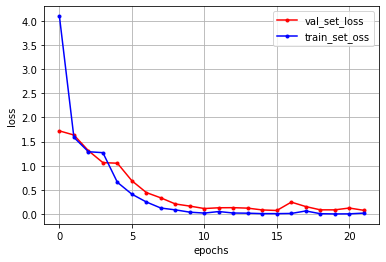

In [20]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [10]:
pred = model.predict(x_test)

In [11]:
print(pred[0])
print(y_test[0])
print(np.argmax(pred[0]))

[1.7133021e-03 6.6910931e-03 9.8380613e-01 7.2826622e-03 7.8001707e-05
 4.2870271e-04]
[0 0 1 0 0 0]
2


In [12]:
def plot_image(i, pred, y_test, x_test):
    pred, y_test, x_test = pred[i], y_test[i], x_test[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(x_test, cmap=plt.cm.binary)
    
    pred_label = np.argmax(pred)
    test_label = np.argmax(y_test)
    print(pred_label)
    print(test_label)
    if pred_label == test_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(categories[pred_label], 100*np.max(pred), categories[test_label]),color=color)

horse


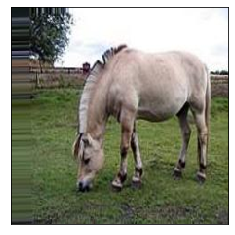

In [15]:
i = 6
plt.xticks([])
plt.yticks([])
plt.imshow(x_train[i], cmap=plt.cm.binary)
a = int(np.argmax(y_train[i]))
print(categories[a])

In [25]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model
import shutil

caltech_dir = "./test_data"
image_w = 224
image_h = 224

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
X = X.astype(float) / 255.0
model = load_model('./model/document_classification.model')

prediction = model.predict(X)

dog


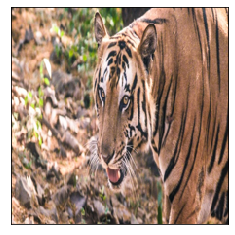

In [45]:
i = 4
plt.xticks([])
plt.yticks([])
plt.imshow(X[i], cmap=plt.cm.binary)

cate = int(np.argmax(prediction[i]))
print(categories[cate])